# Домашняя работа "Оценка точности модели, переобучение, регуляризация"

- Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.
- Построить график Precision - Recall на этих же данных.

## Решениеfrom matplotlib import pyplot

In [1]:
import pandas
import numpy
from matplotlib import pyplot

#### Подготовка данных

In [2]:
data = pandas.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.model_selection import train_test_split

X = data[data.columns[:-1]]
Y = data['affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#### Обучение модели

In [5]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()

model.fit(X_train, Y_train)
predictions = model.predict_proba(X_test)

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

### Посчитать tpr и fpr в ноутбуке к лекции.

In [6]:
def get_matrix_positive_values(prediction, Y_test, thresh):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    for predicted_prob, actual in zip(prediction, Y_test):    
        if predicted_prob >= thresh:
            predicted = 1
        else:
            predicted = 0
    
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
                
    return tp, fp, fn, tn

In [7]:
def custom_roc_curve(Y_test, prediction):
    fpr = []
    tpr = []
    #thres = []

    for thresh in numpy.arange(0, 1, 0.001):
        tp, fp, fn, tn = get_matrix_positive_values(prediction, Y_test, thresh)
    
        tpr.append(tp / (tp + fn))
        fpr.append(fp / (fp + tn))
        #thres.append(tp / (tp + fp))
        
    return fpr, tpr


### Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

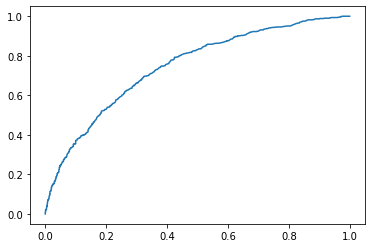

In [8]:
custom_fpr, custom_tpr = custom_roc_curve(
    Y_test=Y_test,
    prediction=predictions[:, 1])

pyplot.plot(custom_fpr, custom_tpr)
pyplot.show()

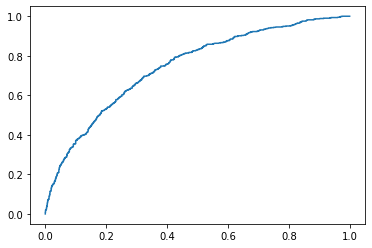

In [9]:
from sklearn.metrics import roc_curve

fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

pyplot.plot(fpr, tpr)
pyplot.show()

### Построить график Precision - Recall на этих же данных

In [40]:
def custom_precision_recall_curve(Y_test, prediction):
    tpr = []  # precision
    recall = []

    for thresh in numpy.arange(0, 1, 0.001):
        tp, fp, fn, tn = get_matrix_positive_values(prediction, Y_test, thresh)
    
        if tp + fp != 0:
            tpr.append(tp / (tp + fp))
            
        if tp + fn != 0:
            recall.append(tp / (tp + fn))
        
    return tpr, recall

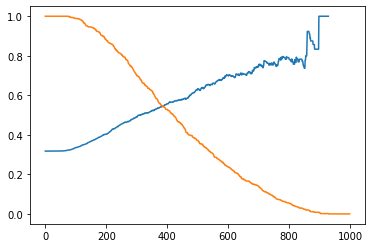

In [41]:
custom_precision, recall = custom_precision_recall_curve(
    Y_test=Y_test,
    prediction=predictions[:, 1])

pyplot.plot(custom_precision)
pyplot.plot(recall)
pyplot.show()

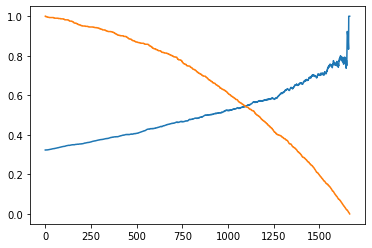

In [11]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_test, predictions[:, 1])

pyplot.plot(precision)
pyplot.plot(recall)
pyplot.show()